<a href="https://colab.research.google.com/github/YoungAldehyde/ds_portfolio/blob/master/PCA_European_Food_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principal Components Analysis) helps us find the underlying drivers hidden in data. It is a super useful feature as it allows us to summarize a long feature sets using just a few key/principal components. #

### We will use the data, food-consumption.csv, which contains 16 countries in Europe and their consumption for 20 food items, such as tea, jam, coffee, yogurt, and others. First, we will perform PCA analysis on the data by treating each country’s food consumption as their “feature” vectors. In other words, we will find weight vectors to combine 20 food-item consumptions for each country.###

In [28]:
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import csv

raw = []
with open("/content/drive/My Drive/data/food-consumption.csv", newline='') as file:
    filereader = csv.reader(file, delimiter=',')
    header = next(filereader)
    for row in filereader:
        raw.append(row)
        
raw = np.array(raw)

countrynames = raw[:,0]
foodnames = np.array(header)[1:]
data = raw[:,1:].astype(float)
m,n = np.shape(data)

In [34]:
print(m,n)

16 20


Based on the file ‘food-consumption.csv’, we have a data matrix with dimension 16×20. Each row is a collection of features for one country, i.e., a data point. Each column is individual food across all different countries, i.e., a feature. The data set has 16 data points, each with 20 features. Suppose  we aim to find top $k$ principal components.

To proceed with PCA, we first define the data $X = \{x_i\in \mathbb{R}^d, i=1...,m \}$, where the total number of data points m = 16, data dimension $d = 20$. 

The PCA procedure:


*   Find the covariance matrix

      $C = \frac{1}{m}\sum_{i=1}^m=(x_i-\mu)(x_i-\mu)^T$
      
      where $\mu = \frac{1}{m}\sum_{i=1}^mx_i$

*   to find the first principle component, we first solve the optimization problem:

      $w_1=\max\limits_{\left\Vert w \right\Vert \leq 1}w^TCw$

  the Lagrangian function,

      $L(w,\lambda) = w^TCw+\lambda(1-\left\Vert w \right\Vert^2)$

  the largest eigenvalue and the corresponding weighted vector become solving for the stationary point of $L(w,\lambda)$

      $\frac{\partial L}{\partial w}=0=2Cw-2\lambda w$
      
      $\rightarrow Cw = \lambda w$ (i.e., $w$ is the eigenvector of C)

      $\rightarrow w^TCw=\lambda w^Tw$

      $\rightarrow \lambda = w^TCw$ (i.e., Objective function becomes $\lambda$)

      to get the principle component, project the data onto the first eigenvectors and scale by corresponding eigenvalue

      $z_1 = w_1^T(x-\mu)/ \sqrt{\lambda_1} $

*   To the rest of the principle components, we optimize the following problem

 $\max\limits_{\left\Vert w \right\Vert \leq 1,w⊥w_j,\forall j=1,...,i-1}w^TCW$

  which is equivalent to

  $\max\limits_{\left\Vert w \right\Vert \leq 1}w^T(C-\sum_{j=1}^{i-1}\lambda_jw_jw_j^T)w,$

   where $\lambda_j, w_j$ are the eigenvalues and weighted vectors found prior to i. Then the rest principle component can be obtained by similar projection as in the previous step:
   
  $z=\begin{bmatrix}
      w_1^T(x-\mu)/\sqrt(\lambda_1) \\
      w_2^T(x-\mu)/\sqrt(\lambda_2) \\
      \vdots \\
      w_d^T(x-\mu)/\sqrt(\lambda_d) \\
  \end{bmatrix}$

*   We can further see that, since

   $\lambda_jw_jw_j^T>0$

   $w^TCw>w^T(C-\sum_{j=1}^{i-1}\lambda_jw_jw_j^T)w$

  hence, $\lambda_1$ is the largest eigenvalue.



### Let's assume k = 2, i.e., we will find the first two principal components for each data point. ###

<Figure size 432x288 with 0 Axes>

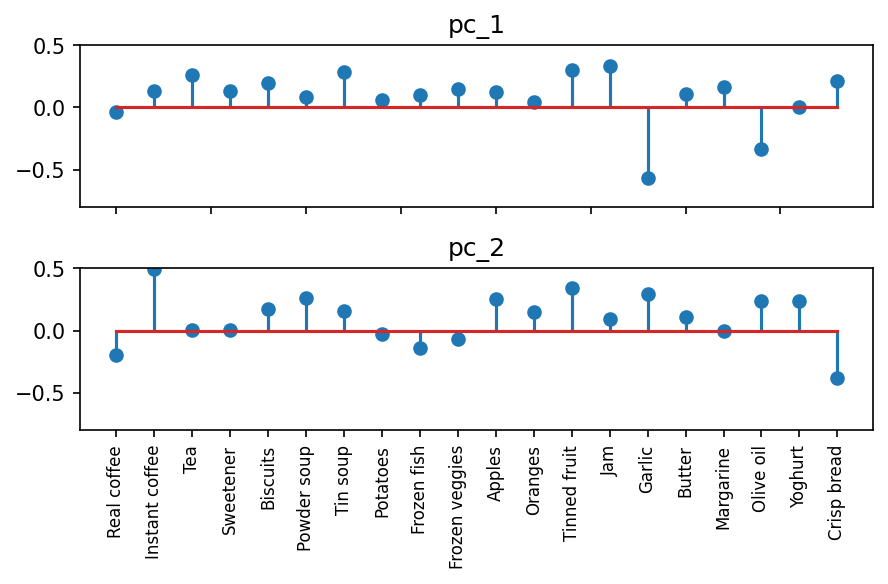

In [37]:
k=2
mu = np.mean(data, axis=0)
demean = data - np.tile(mu, [m, 1])
C = demean.T @ demean/m

u, s, _ = np.linalg.svd(C)

plt.figure()
xx= np.arange(0,n, 1)

fig1, ax1 = plt.subplots(nrows=2, ncols=1)

ax11 = plt.subplot(2,1,1)
plt.stem(xx, u[:,0], use_line_collection=True)
plt.ylim([-0.8,0.5])
plt.title('pc_1')

ax12 = plt.subplot(2,1,2)
plt.stem(xx, u[:,1], use_line_collection=True)
plt.title('pc_2')
plt.ylim([-0.8,0.5])
plt.xticks(xx,foodnames, rotation=90, fontsize = 8)

ax11.get_shared_x_axes().join(ax11, ax12)
ax11.set_xticklabels([])

fig1.tight_layout(pad=1)
fig1.set_dpi(150)

#### The first two weighted vectors $w_1$, $w_2$ are shown as the above plots. In the first plot, we can see that most of the entries of $w_1$ have similar value, this implies that the first eigenvector captures the mean of the data features. For the second eigenvectors $w_2$, on the contrary, is capturing the difference of the data features, since the entries of the $w_2$ have opposite signs and different values. ####


#### Now let's extract the first two principal components for each data point, so we can easily plot it in 2d ####

Text(0.5, 1.0, 'pc plot for each country')

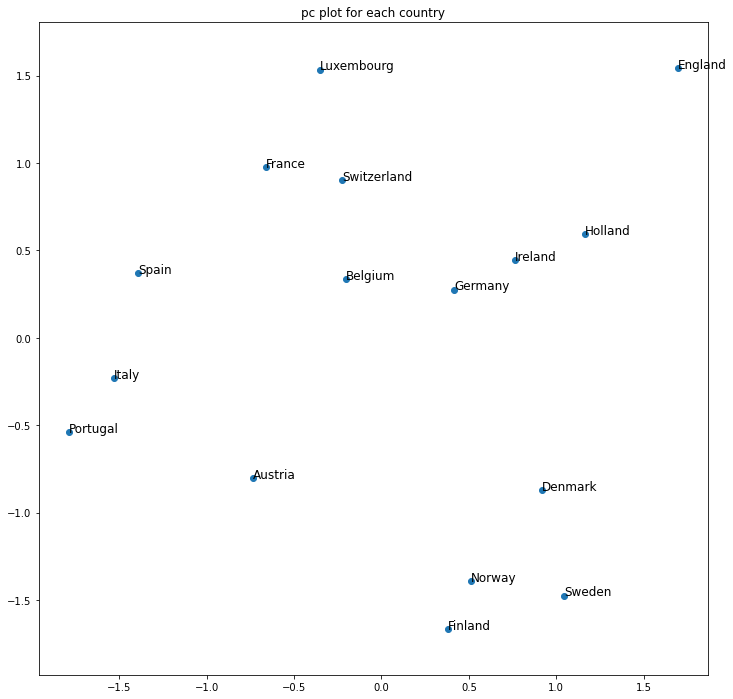

In [44]:
pc = demean @ u[:,:k] @ np.diag((1/np.sqrt(s[0:k])))
plt.figure(figsize=(12,12))
plt.scatter(pc[:,0], pc[:,1])
plt.axis('equal')
for ii, txt in enumerate(countrynames):
    plt.annotate(txt, (pc[ii, 0], pc[ii, 1]),fontsize=12)
plt.title('pc plot for each country')


#### From the scatter plot we can learn that food consumption habits of the people from Finland, England and Portugal are much more distinctive, since their projected locations are on the edges of the plot. Other counties tend to have more moderate food consumption styles. ####

#### Now, let's flip the role. We will perform PCA analysis on the data by treating country consumptions as “feature” vectors for each food item. In other words, we will now find weight vectors to combine country consumptions for each food item to perform PCA another way. ####


Text(0.5, 1.0, 'pc plot for each food')

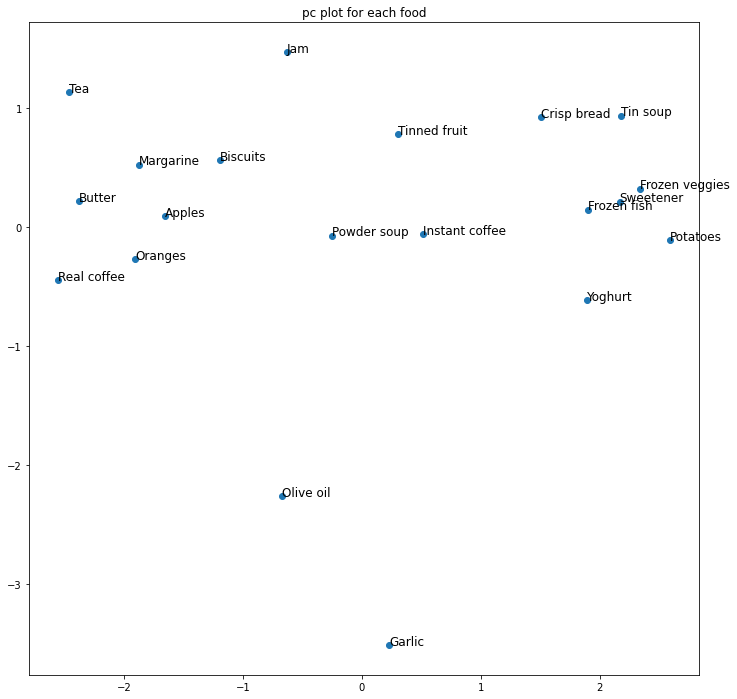

In [45]:
data1 = data.T
mu1 = np.mean(data1, axis=0)
demean1 = data1 - np.tile(mu1, [n, 1])
C1 = demean1.T @ demean1/n

u1, s1, _ = np.linalg.svd(C1)

pc1 = demean1 @ u1[:,:k] @ np.diag((1/np.sqrt(s[0:k])))
plt.figure(figsize=(12,12))
plt.scatter(pc1[:,0], pc1[:,1])
plt.axis('equal')
for ii, txt in enumerate(foodnames):
    plt.annotate(txt, (pc1[ii, 0], pc1[ii, 1]), fontsize=12)
plt.title('pc plot for each food')    

#### From the scatter plot we can learn that the consumption for garlic is quite polarized among countries, i.e., either like it a lot or dislike it much. The consumption for OliveOil has similar situation but somewhat less polarized. The preferences for all other foods are more evenly distributed across countries, i.e., some country dislike it, some barely ok, some neutral, some a bit positive and some like it a lot. ####